## Test to see if matplotlib works well

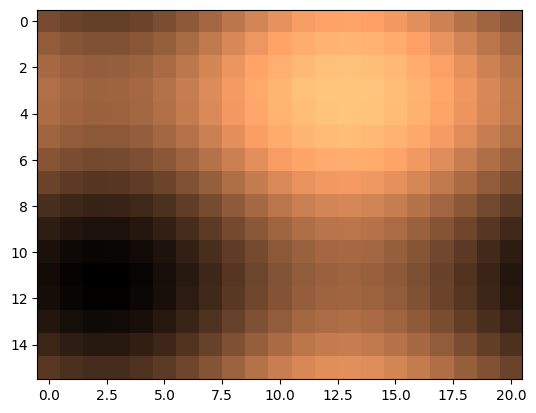

In [66]:
import torch
import math

def gen_sineembed_for_position(pos_tensor):
    # n_query, bs, _ = pos_tensor.size()
    # sineembed_tensor = torch.zeros(n_query, bs, 256)
    scale = 2 * math.pi
    dim_t = torch.arange(128, dtype=torch.float32, device=pos_tensor.device)
    dim_t = 1 ** (2 * (dim_t // 2) / 128)
    x_embed = pos_tensor[:, :, 0] * scale
    y_embed = pos_tensor[:, :, 1] * scale
    pos_x = x_embed[:, :, None] / dim_t
    pos_y = y_embed[:, :, None] / dim_t
    pos_x = torch.stack((pos_x[:, :, 0::2].sin(), pos_x[:, :, 1::2].cos()), dim=3).flatten(2)
    pos_y = torch.stack((pos_y[:, :, 0::2].sin(), pos_y[:, :, 1::2].cos()), dim=3).flatten(2)
    if pos_tensor.size(-1) == 2:
        pos = torch.cat((pos_y, pos_x), dim=2)
    elif pos_tensor.size(-1) == 4:
        w_embed = pos_tensor[:, :, 2] * scale
        pos_w = w_embed[:, :, None] / dim_t
        pos_w = torch.stack((pos_w[:, :, 0::2].sin(), pos_w[:, :, 1::2].cos()), dim=3).flatten(2)

        h_embed = pos_tensor[:, :, 3] * scale
        pos_h = h_embed[:, :, None] / dim_t
        pos_h = torch.stack((pos_h[:, :, 0::2].sin(), pos_h[:, :, 1::2].cos()), dim=3).flatten(2)

        pos = torch.cat((pos_y, pos_x, pos_w, pos_h), dim=2)
    else:
        raise ValueError("Unknown pos_tensor shape(-1):{}".format(pos_tensor.size(-1)))
    return pos

torch.manual_seed(1)
pos_tensor = torch.randn((1,1,4))


h = 16
w = 21
bs = 1

y_embed = torch.arange(1, h + 1).unsqueeze(0).unsqueeze(2)
y_embed = y_embed.repeat(bs, 1, w)
x_embed = torch.arange(1, w + 1).unsqueeze(0).unsqueeze(1)
x_embed = x_embed.repeat(bs, h, 1)

eps = 1e-6
y_embed = y_embed / (y_embed[:, -1:, :] + eps) * 2 * math.pi
x_embed = x_embed / (x_embed[:, :, -1:] + eps) * 2 * math.pi

dim_t = torch.arange(128, dtype=torch.float32)
dim_t = 1 ** (2 * (dim_t // 2) / 128)

pos_x = x_embed[:, :, :, None] / dim_t
pos_y = y_embed[:, :, :, None] / dim_t
pos_x = torch.stack((pos_x[:, :, :, 0::2].sin(), pos_x[:, :, :, 1::2].cos()), dim=4).flatten(3)
pos_y = torch.stack((pos_y[:, :, :, 0::2].sin(), pos_y[:, :, :, 1::2].cos()), dim=4).flatten(3)
pos = torch.cat((pos_y, pos_x), dim=3).permute(0, 3, 1, 2)


import matplotlib.pyplot as plt
pos = pos.flatten(2).permute(0,2,1).contiguous().squeeze()
pos2 = gen_sineembed_for_position(pos_tensor)[..., :256].squeeze(0)
weights = (torch.matmul(pos, pos2.T)/torch.norm(torch.matmul(pos, pos2.T), p=2).sqrt()).reshape(16,21)
plt.figure()
plt.imshow(weights, cmap='copper')#, interpolation='bicubic')
plt.show()

In [64]:
pos.shape

torch.Size([336, 256])

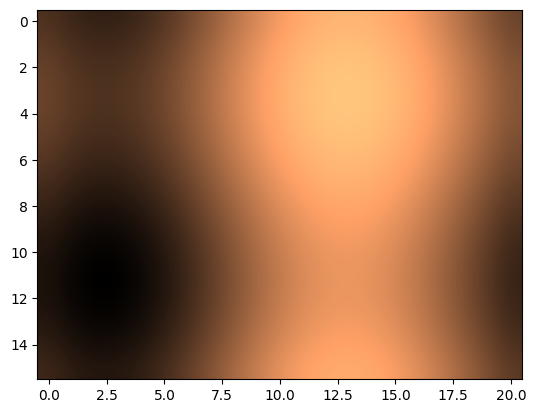

In [52]:
import torch
import math

def gen_sineembed_for_position(pos_tensor):
    # n_query, bs, _ = pos_tensor.size()
    # sineembed_tensor = torch.zeros(n_query, bs, 256)
    scale = 2 * math.pi
    dim_t = torch.arange(128, dtype=torch.float32, device=pos_tensor.device)
    dim_t = 1 ** (2 * (dim_t // 2) / 128)
    x_embed = pos_tensor[:, :, 0] * scale
    y_embed = pos_tensor[:, :, 1] * scale
    pos_x = x_embed[:, :, None] / dim_t
    pos_y = y_embed[:, :, None] / dim_t
    pos_x = torch.stack((pos_x[:, :, 0::2].sin(), pos_x[:, :, 1::2].cos()), dim=3).flatten(2)
    pos_y = torch.stack((pos_y[:, :, 0::2].sin(), pos_y[:, :, 1::2].cos()), dim=3).flatten(2)
    if pos_tensor.size(-1) == 2:
        pos = torch.cat((pos_y, pos_x), dim=2)
    elif pos_tensor.size(-1) == 4:
        w_embed = pos_tensor[:, :, 2] * scale
        pos_w = w_embed[:, :, None] / dim_t
        pos_w = torch.stack((pos_w[:, :, 0::2].sin(), pos_w[:, :, 1::2].cos()), dim=3).flatten(2)

        h_embed = pos_tensor[:, :, 3] * scale
        pos_h = h_embed[:, :, None] / dim_t
        pos_h = torch.stack((pos_h[:, :, 0::2].sin(), pos_h[:, :, 1::2].cos()), dim=3).flatten(2)

        pos = torch.cat((pos_y, pos_x, pos_w, pos_h), dim=2)
    else:
        raise ValueError("Unknown pos_tensor shape(-1):{}".format(pos_tensor.size(-1)))
    return pos

torch.manual_seed(1)
pos_tensor = torch.randn((1,1,4))


h = 16
w = 21
bs = 1

y_embed = torch.arange(1, h + 1).unsqueeze(0).unsqueeze(2)
y_embed = y_embed.repeat(bs, 1, w)
x_embed = torch.arange(1, w + 1).unsqueeze(0).unsqueeze(1)
x_embed = x_embed.repeat(bs, h, 1)

eps = 1e-6
y_embed = y_embed / (y_embed[:, -1:, :] + eps) * 2 * math.pi
x_embed = x_embed / (x_embed[:, :, -1:] + eps) * 2 * math.pi

dim_t = torch.arange(128, dtype=torch.float32)
dim_t = 1 ** (2 * (dim_t // 2) / 128)

pos_x = x_embed[:, :, :, None] / dim_t
pos_y = y_embed[:, :, :, None] / dim_t
pos_x = torch.stack((pos_x[:, :, :, 0::2].sin(), pos_x[:, :, :, 1::2].cos()), dim=4).flatten(3)
pos_y = torch.stack((pos_y[:, :, :, 0::2].sin(), pos_y[:, :, :, 1::2].cos()), dim=4).flatten(3)
pos = torch.cat((pos_y, pos_x), dim=3).permute(0, 3, 1, 2)


import matplotlib.pyplot as plt
pos = pos.flatten(2).permute(0,2,1).contiguous().squeeze()
pos2 = gen_sineembed_for_position(pos_tensor)[..., :256].squeeze(0)
# pos2[..., :128] *= 3
pos2[..., 128:] *= 3
weights = (torch.matmul(pos, pos2.T)/torch.norm(torch.matmul(pos, pos2.T), p=2).sqrt()).reshape(16,21)
plt.figure()
plt.imshow(weights, cmap='copper', interpolation='bicubic')
plt.show()
